<a href="https://colab.research.google.com/github/Hepzibha24/hepz/blob/main/EDA_MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv(r"/content/Telco_Cusomer_Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(7043, 21)

make boxplot outlier treatment

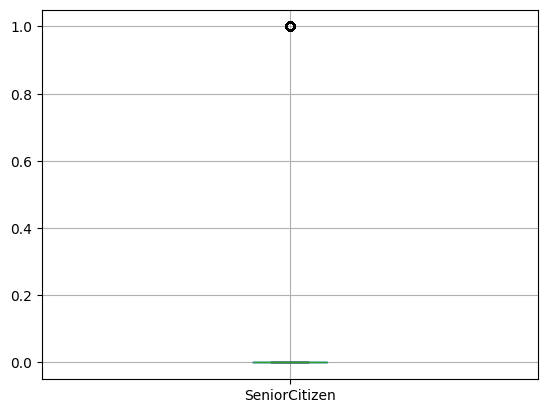

In [ ]:
df.boxplot(column=['SeniorCitizen'])
plt.show()

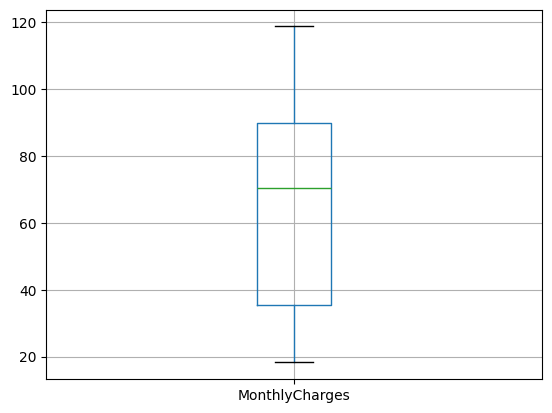

In [ ]:
df.boxplot(column=['MonthlyCharges'])
plt.show()

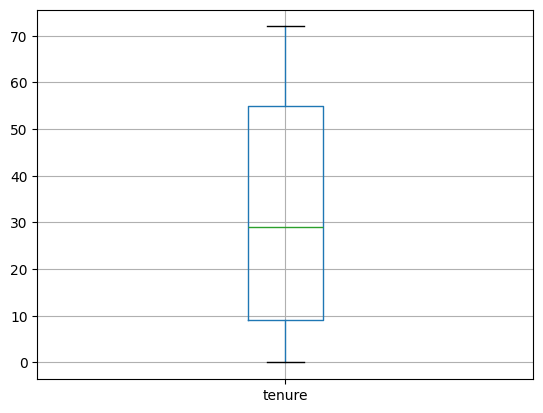

In [ ]:
df.boxplot(column=['tenure'])
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN in 'TotalCharges' created by coercion
df.dropna(subset=['TotalCharges'], inplace=True)

lrMonthlyCharge, urMonthlyCharge = remove_outlier(df['MonthlyCharges'])
df['MonthlyCharges'] = np.where(df['MonthlyCharges'] > urMonthlyCharge, urMonthlyCharge, df['MonthlyCharges'])
df['MonthlyCharges'] = np.where(df['MonthlyCharges'] < lrMonthlyCharge, lrMonthlyCharge, df['MonthlyCharges'])

Irtenure, urtenure = remove_outlier(df['tenure'])
df['tenure'] = np.where(df['tenure'] > urtenure, urtenure, df['tenure'])
df['tenure'] = np.where(df['tenure'] < Irtenure, Irtenure, df['tenure'])

IrSenior, urSenior = remove_outlier(df['SeniorCitizen'])
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] > urSenior, urSenior, df['SeniorCitizen'])
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] < IrSenior, IrSenior, df['SeniorCitizen'])

lrTotalCharges, urTotalCharges = remove_outlier(df['TotalCharges'])
df['TotalCharges'] = np.where(df['TotalCharges'] > urTotalCharges, urTotalCharges, df['TotalCharges'])
df['TotalCharges'] = np.where(df['TotalCharges'] < lrTotalCharges, lrTotalCharges, df['TotalCharges'])

df.shape

(7032, 21)

make boxplot after outlier treatment




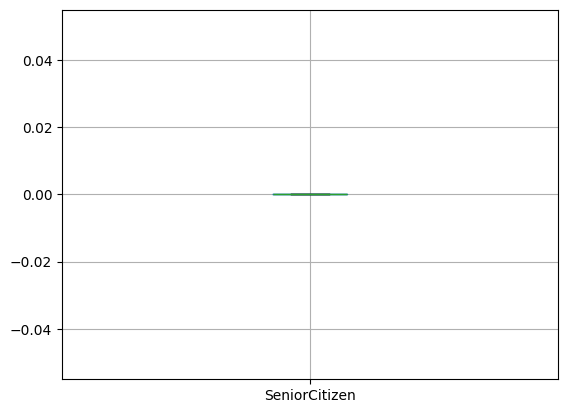

In [ ]:
df.boxplot(column=['SeniorCitizen'])
plt.show()

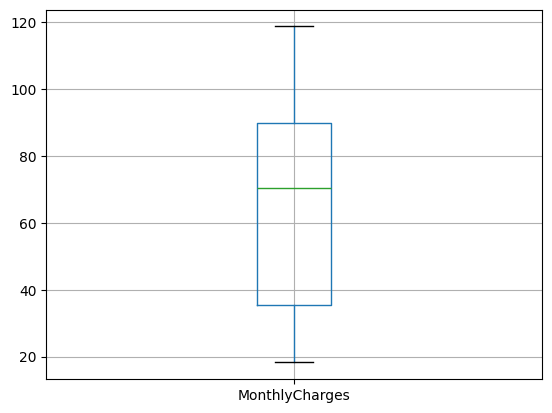

In [ ]:
df.boxplot(column=['MonthlyCharges'])
plt.show()

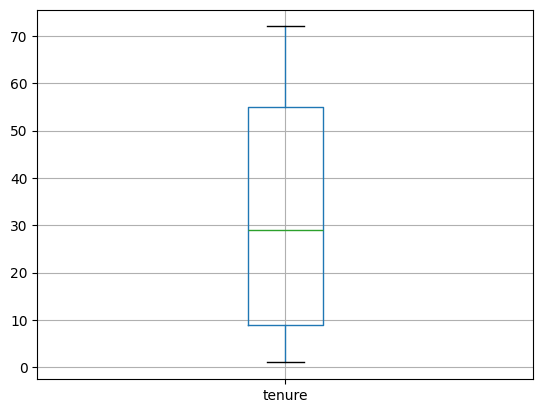

In [ ]:
df.boxplot(column=['tenure'])
plt.show()

In [ ]:
#check for missing value in any column
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


replacing NULL values in numerical columns using median